<a href="https://colab.research.google.com/github/cflores23/optimizacion/blob/main/akaike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('covid_mex.csv')
df.head(10)

,date,total_cases,total_deaths
0,2/28/2020,1,0
1,2/29/2020,4,0
2,03/01/20,5,0
3,03/02/20,5,0
4,03/03/20,5,0
5,03/04/20,5,0
6,03/05/20,5,0
7,03/06/20,6,0
8,03/07/20,6,0
9,03/08/20,7,0


In [ ]:
df.describe()

,total_cases,total_deaths
count,6.730000e+02,673.000000
mean,1.749270e+06,148976.153046
std,1.324332e+06,102152.803185
min,1.000000e+00,0.000000
25%,5.113690e+05,55908.000000
50%,1.841893e+06,156579.000000
75%,2.642068e+06,236015.000000
max,3.979723e+06,299428.000000


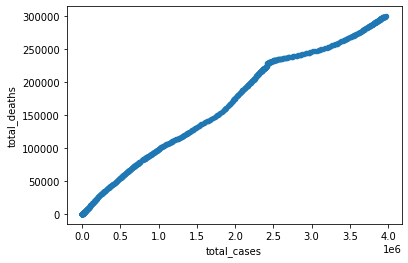

In [ ]:
graf=df.plot("total_cases","total_deaths", kind="scatter")
plt.show()

In [ ]:
scaler = MinMaxScaler()
df[["total_cases_scaled"]] = scaler.fit_transform(df[["total_cases"]])
df[["total_deaths_scaled"]] = scaler.fit_transform(df[["total_deaths"]])
df

,date,total_cases,total_deaths,total_cases_scaled,total_deaths_scaled
0,2/28/2020,1,0,0.000000e+00,0.000000
1,2/29/2020,4,0,7.538215e-07,0.000000
2,03/01/20,5,0,1.005095e-06,0.000000
3,03/02/20,5,0,1.005095e-06,0.000000
4,03/03/20,5,0,1.005095e-06,0.000000
...,...,...,...,...,...
668,12/27/2021,3951003,298777,9.927834e-01,0.997826
669,12/28/2021,3951946,298819,9.930204e-01,0.997966
670,12/29/2021,3956372,298944,9.941325e-01,0.998384
671,12/30/2021,3961662,299132,9.954617e-01,0.999011


In [ ]:
scaler = MinMaxScaler()
x = df['total_cases_scaled']
y = df['total_deaths_scaled']

In [ ]:
x=x.to_numpy(x)
y=y.to_numpy(y)
print(y)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.33970103e-06 6.67940206e-06 6.67940206e-06 1.00191031e-05
 1.33588041e-05 1.66985051e-05 2.00382062e-05 2.67176082e-05
 4.00764124e-05 5.34352165e-05 6.67940206e-05 9.35116288e-05
 9.68513299e-05 1.23568938e-04 1.66985051e-04 2.00382062e-04
 2.63836381e-04 3.13931897e-04 4.17462629e-04 4.70897845e-04
 5.81107979e-04 6.47902000e-04 7.78150340e-04 9.11738381e-04
 9.88551505e-04 1.10878074e-03 1.35591862e-03 1.49952576e-03
 1.62309470e-03 1.82347676e-03 2.17080567e-03 2.29103491e-03
 2.37786713e-03 2.86212378e-03 3.23951000e-03 3.57014040e-03
 4.07777496e-03 4.35830984e-03 4.51193609e-03 4.78913128e-03
 5.23999092e-03 5.78436218e-03 6.20850421e-03 6.58589043e-03
 6.88312382e-03 7.193716

In [ ]:
pr = PoissonRegressor(alpha=0, fit_intercept=False,max_iter=1000)
y_pred_pr = pr.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))
y_pred_pr

array([1.        , 0.99999968, 0.99999958, 0.99999958, 0.99999958,
       0.99999958, 0.99999958, 0.99999947, 0.99999947, 0.99999937,
       0.99999937, 0.99999937, 0.99999926, 0.99999884, 0.99999737,
       0.99999579, 0.99999452, 0.99999147, 0.99999031, 0.99998768,
       0.99998283, 0.99997872, 0.99997367, 0.99996682, 0.99996145,
       0.99995745, 0.99995008, 0.99993849, 0.99992459, 0.9999108 ,
       0.99989552, 0.99988489, 0.99987215, 0.99985498, 0.99984108,
       0.99982234, 0.99980106, 0.99977442, 0.99974325, 0.99970682,
       0.99966513, 0.99963775, 0.99959532, 0.99955584, 0.99950931,
       0.99947215, 0.99943163, 0.99938447, 0.9993371 , 0.99927627,
       0.99921081, 0.99913041, 0.99907663, 0.99899993, 0.99889019,
       0.99877563, 0.9986453 , 0.99854328, 0.99845547, 0.99836587,
       0.99823728, 0.99812721, 0.99797742, 0.99781819, 0.99767643,
       0.99753111, 0.99738046, 0.99726282, 0.99709383, 0.99688571,
       0.99668561, 0.99648219, 0.99631826, 0.99618133, 0.99597

In [ ]:
lr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
y_pred_pr = lr.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))
y_pred_pr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


array([0.05126234, 0.05126311, 0.05126336, 0.05126336, 0.05126336,
       0.05126336, 0.05126336, 0.05126362, 0.05126362, 0.05126387,
       0.05126387, 0.05126387, 0.05126413, 0.05126515, 0.05126872,
       0.05127254, 0.05127561, 0.051283  , 0.05128581, 0.05129219,
       0.05130392, 0.05131387, 0.05132612, 0.0513427 , 0.05135571,
       0.05136541, 0.05138327, 0.05141133, 0.05144501, 0.05147843,
       0.05151542, 0.05154119, 0.05157206, 0.05161364, 0.05164732,
       0.05169273, 0.05174426, 0.05180881, 0.05188432, 0.05197259,
       0.05207362, 0.05213995, 0.05224277, 0.05233844, 0.0524512 ,
       0.05254126, 0.05263948, 0.05275377, 0.05286858, 0.05301603,
       0.05317472, 0.05336963, 0.0535    , 0.05368598, 0.05395207,
       0.0542299 , 0.05454599, 0.05479346, 0.05500648, 0.05522384,
       0.05553586, 0.05580297, 0.05616651, 0.05655302, 0.05689718,
       0.05725001, 0.05761585, 0.05790158, 0.05831207, 0.05881772,
       0.05930398, 0.0597984 , 0.0601969 , 0.06052983, 0.06103